<a href="https://colab.research.google.com/github/Arrabonae/autoencoder/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library import

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
K = tf.keras

# Dummy Network on 3 features random Data

Import Data - Random data with 3 features

In [ ]:
random = pd.read_csv('random_data_3D.csv' ,index_col ='Unnamed: 0' )
random.head()

,EJWY,VALM,EGXO
0,-2.032145,1.019576,-9.658715
1,8.306217,6.649376,-0.960333
2,6.570842,6.985462,-1.842621
3,-1.139972,0.579422,-9.526530
4,-1.738104,0.234729,-11.558768


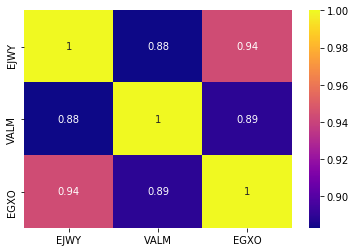

In [ ]:
sns.heatmap(random.corr(),cmap='plasma', annot=True)

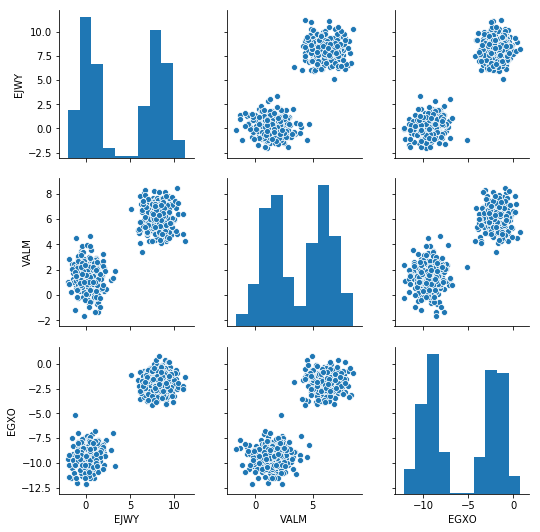

In [ ]:
sns.pairplot(random)

Text(0.5, 0, 'EGXO Label')

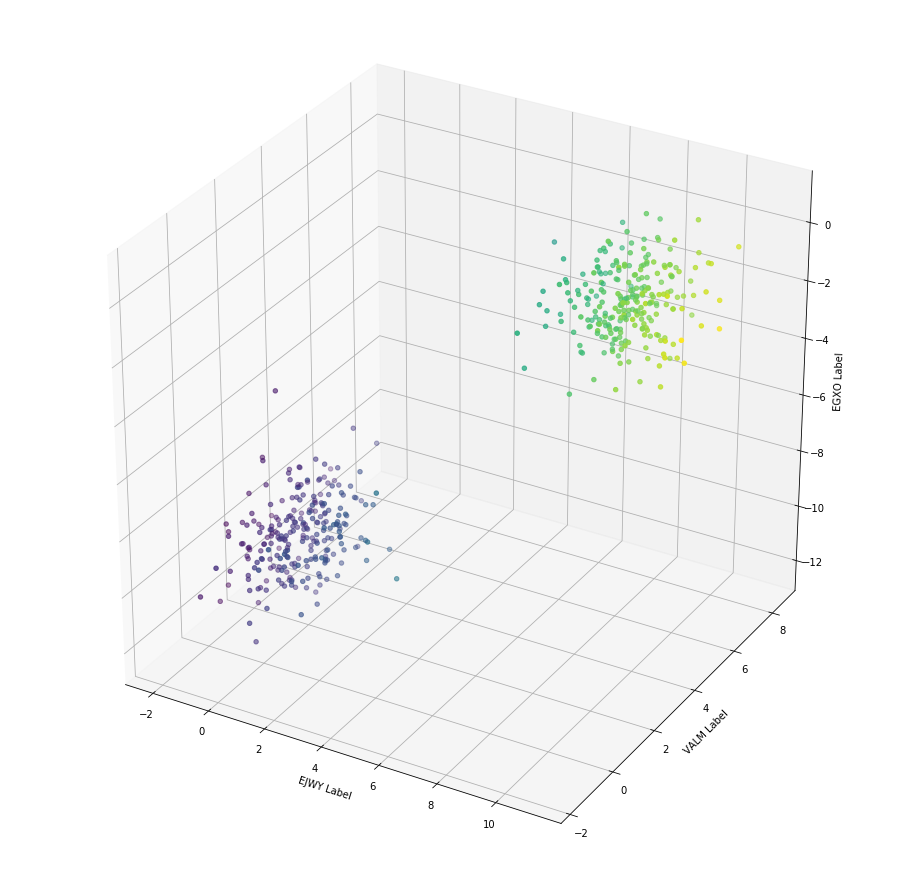

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
x = random['EJWY']
y = random['VALM']
z = random['EGXO']
ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('EJWY Label')
ax.set_ylabel('VALM Label')
ax.set_zlabel('EGXO Label')

# Auto Encoder

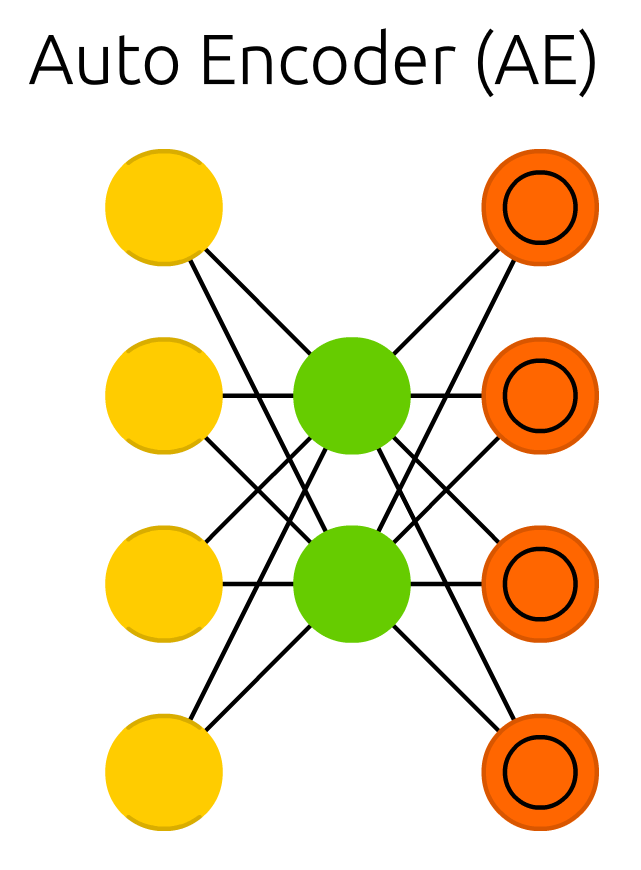

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(random)
scaled_data_1 = pd.DataFrame(scaled_data)

In [ ]:
encoder = K.models.Sequential([K.layers.Dense(2, input_shape=(3,)),
                               K.layers.Dense(3, activation=None)])

encoder.summary()
adam=tf.keras.optimizers.Adam(lr=0.01, epsilon=None, amsgrad=True, decay=0)
encoder.compile(loss ='mean_squared_error', optimizer=adam, metrics=['accuracy'])

history = encoder.fit(scaled_data_1, scaled_data_1, epochs=120, batch_size=10, verbose=1)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
500/500 [==============================] - 0s 233us/sample - loss: 0.3050 - acc: 0.3340
Epoch 2/120
500/500 [==============================] - 0s 118us/sample - loss: 0.0452 - acc: 0.5500
Epoch 3/120
500/500 [==============================] - 0s 114us/sample - loss: 0.0251 - acc: 0.5480
Epoch 4/120
500/500 [==============================] - 0s 90us/sample - loss: 0.0159 - acc: 0.5300
Epoch 5/120
500/500 [==============================] - 0s 96us/sample - loss: 0.0105 - acc: 0.5380
Epoch 6/120
500/500 [

In [ ]:
new_model= K.models.Sequential([K.layers.Dense(2, input_shape=(3,))])
new_model.set_weights(encoder.layers[0].get_weights())
new_model.compile(optimizer='adam', loss='categorical_crossentropy')
new_model.summary()
pred = new_model.predict(scaled_data_1)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 2)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [ ]:
data = pd.DataFrame(pred)

Text(0.5, 0, 'EGXO Label')

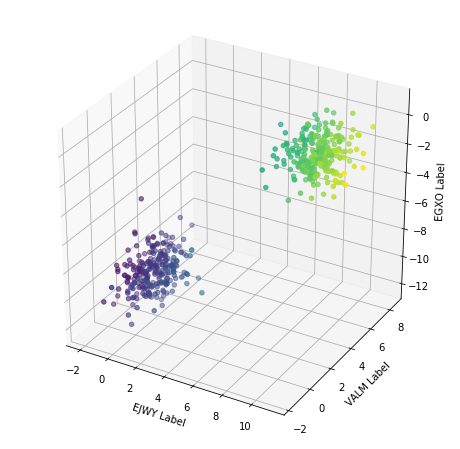

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
x = random['EJWY']
y = random['VALM']
z = random['EGXO']
ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('EJWY Label')
ax.set_ylabel('VALM Label')
ax.set_zlabel('EGXO Label')

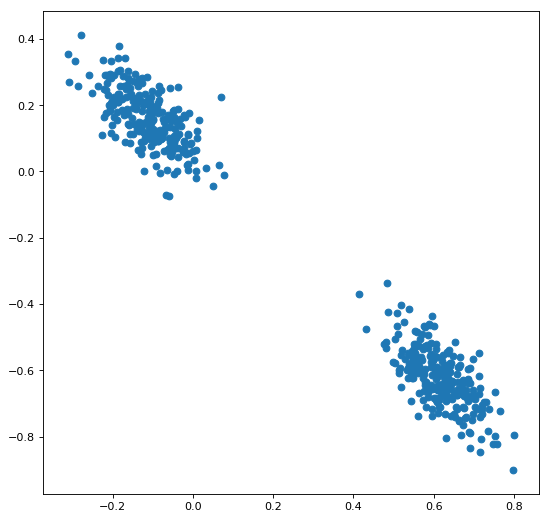

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(data[0], data[1])

# Outlier search - IsolationForest

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_isolation_forest_001.png)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(data)

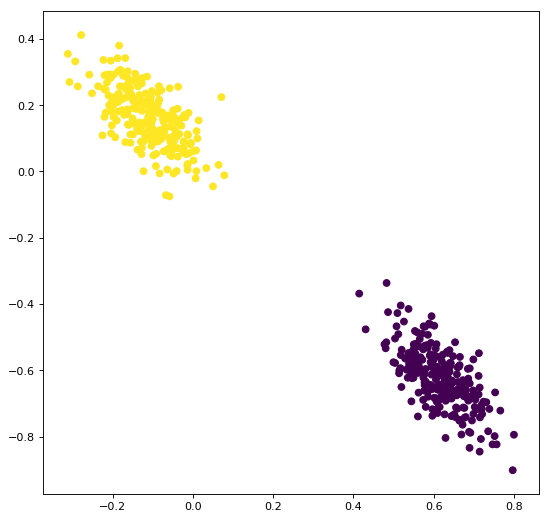

In [ ]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(data[0], data[1], c=y_km)

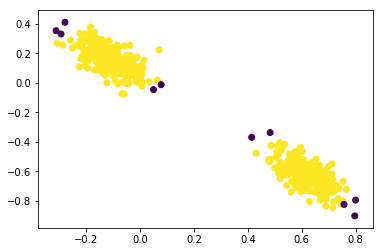

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(behaviour = 'new', random_state = 42, contamination = 0.02) #contamination= 'auto'

preds = clf.fit_predict(data)
plt.scatter(data[0], data[1], c=preds)

In [ ]:
data['label'] = preds

In [ ]:
outliers = data[data['label']== -1]

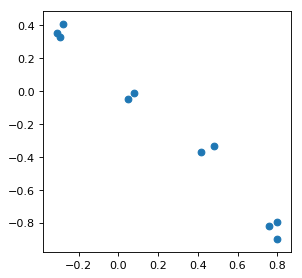

In [ ]:
plt.figure(figsize=(4, 4), dpi=80)
plt.scatter(outliers[0], outliers[1])

# German Credit Dataset

https://www.kaggle.com/uciml/german-credit

**Context**

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.


**Content**

It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - * skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

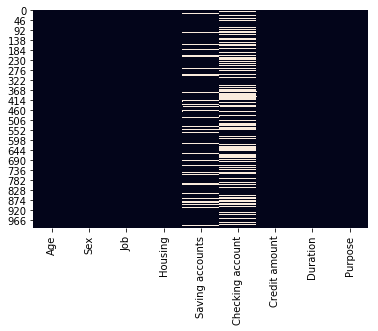

In [ ]:
german = pd.read_csv('/german_credit_data.csv', index_col='Unnamed: 0')
german.head()
sns.heatmap(german.isnull(), cbar=False)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


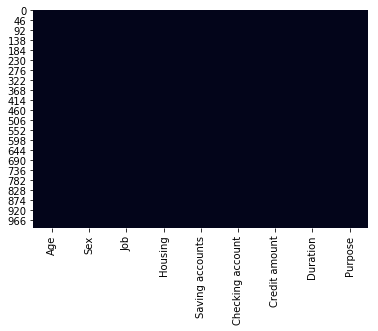

In [ ]:
german.fillna(value='little', inplace=True)
sns.heatmap(german.isnull(), cbar=False)
german.head()

One hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

class MultiColumnLabelEncoder:
    
    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        
        output = X.copy()
        
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        
        return output
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [ ]:
le = MultiColumnLabelEncoder()
german_le = le.fit_transform(german)
german_le.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,48,1,2,1,0,0,142,2,5
1,3,0,2,1,0,1,770,29,5
2,30,1,1,1,0,0,390,8,3
3,26,1,2,0,0,0,848,26,4
4,34,1,2,0,0,0,734,17,1


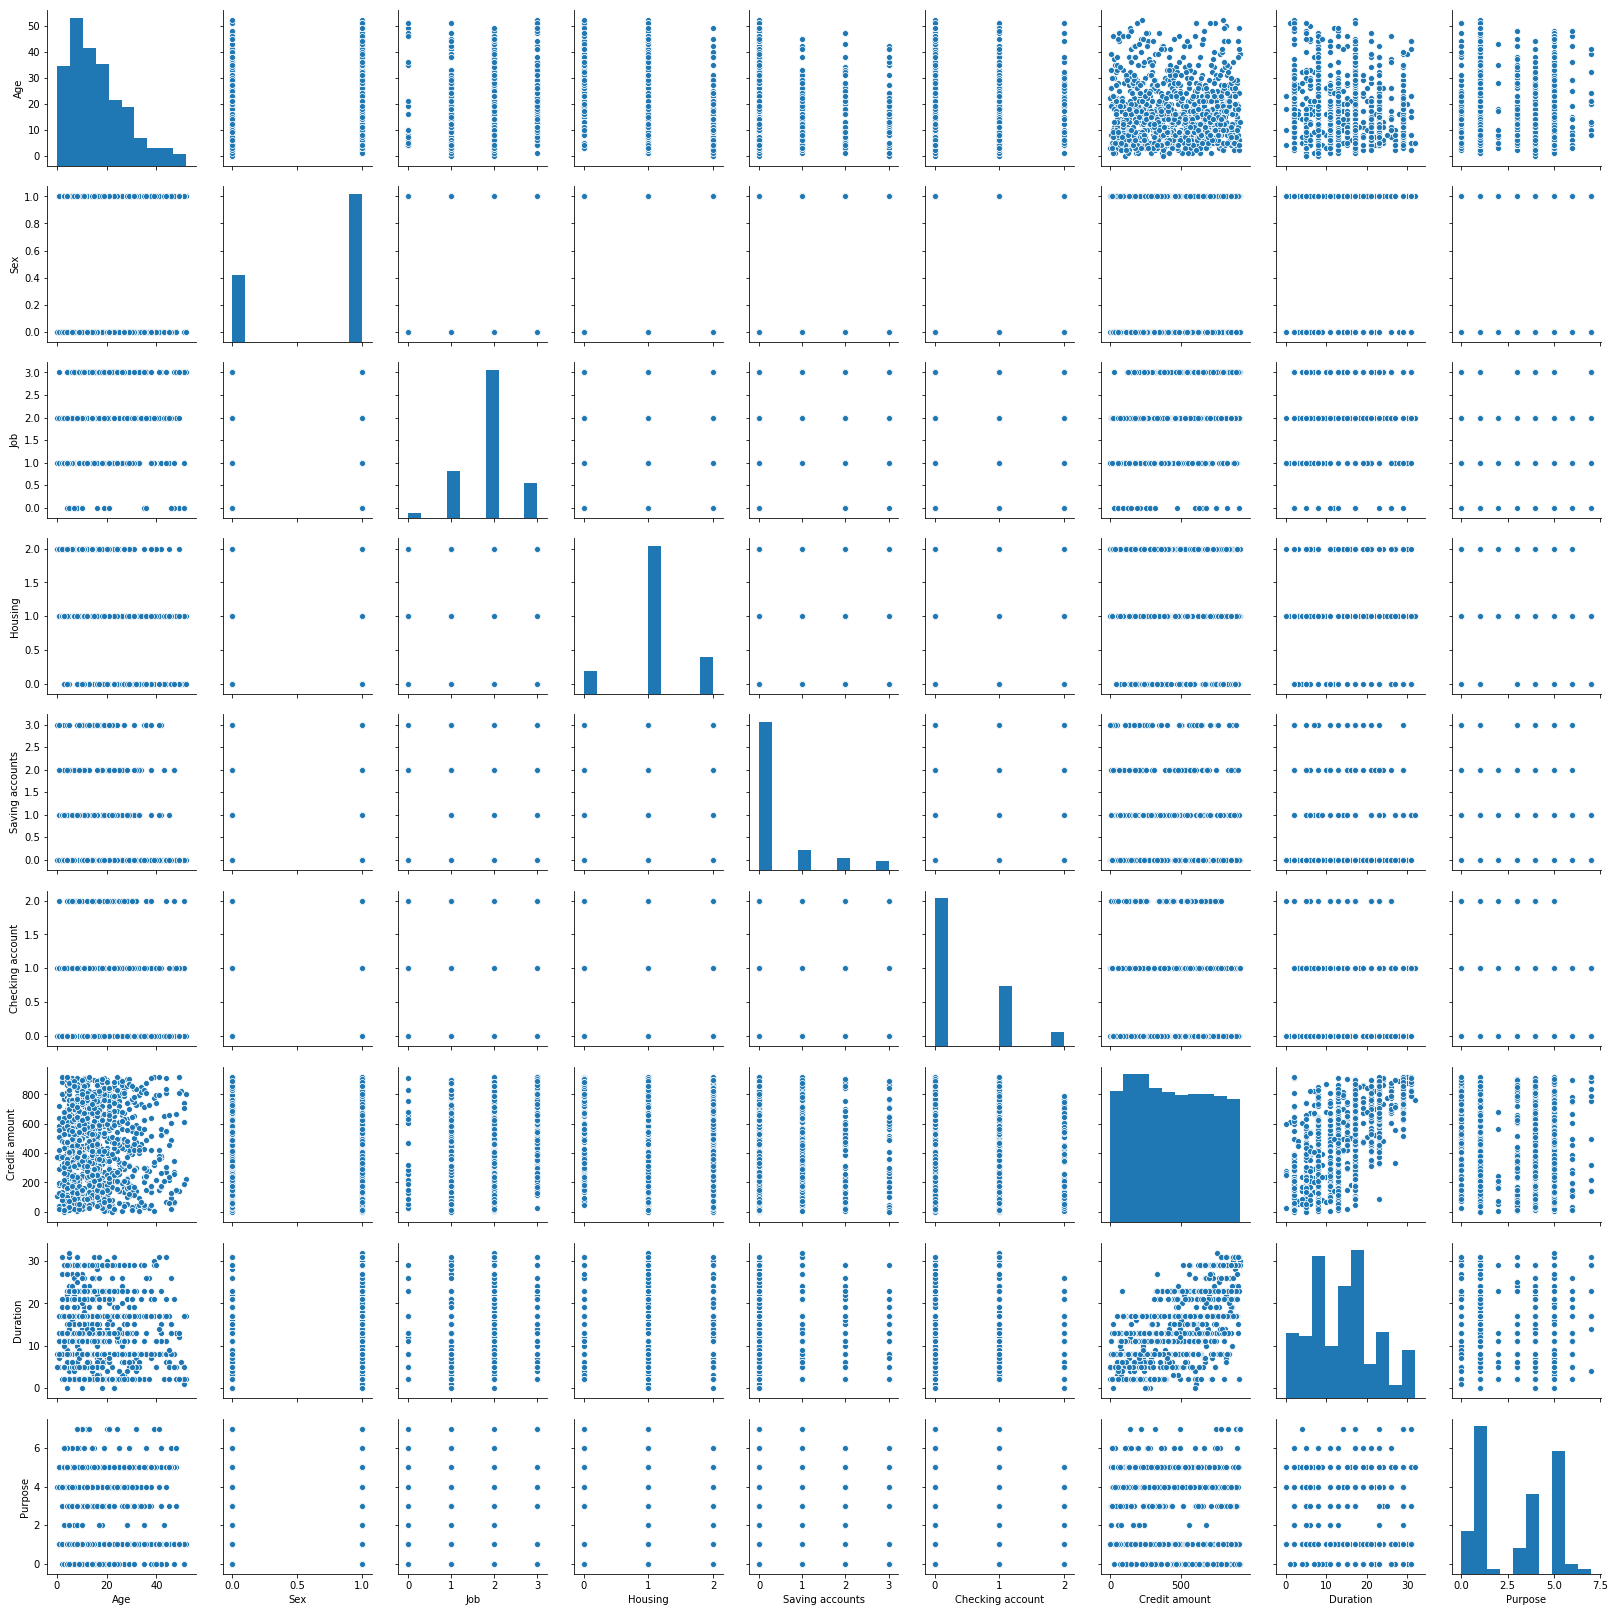

In [ ]:
sns.pairplot(german_le)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_data_ger = scaler.fit_transform(german_le)
scaled_data_german = pd.DataFrame(scaled_data_ger)
scaled_data_german = pd.DataFrame(scaled_data_german)

In [ ]:
scaled_data_german.shape

(1000, 9)

In [ ]:
encoder = K.models.Sequential([K.layers.Dense(3, input_shape=(scaled_data_german.shape[1],)),
                               K.layers.Dense(scaled_data_german.shape[1], activation=None)])

encoder.summary()
adam=tf.keras.optimizers.Adam(lr=0.01, epsilon=None, amsgrad=True, decay=0)
encoder.compile(loss ='mean_squared_error', optimizer=adam, metrics=['accuracy'])

history = encoder.fit(scaled_data_german, scaled_data_german, epochs=120, batch_size=10, verbose=2)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 3)                 30        
_________________________________________________________________
dense_54 (Dense)             (None, 9)                 36        
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
1000/1000 - 0s - loss: 0.1032 - acc: 0.5290
Epoch 2/120
1000/1000 - 0s - loss: 0.0503 - acc: 0.7740
Epoch 3/120
1000/1000 - 0s - loss: 0.0442 - acc: 0.8220
Epoch 4/120
1000/1000 - 0s - loss: 0.0418 - acc: 0.8120
Epoch 5/120
1000/1000 - 0s - loss: 0.0399 - acc: 0.8010
Epoch 6/120
1000/1000 - 0s - loss: 0.0391 - acc: 0.8010
Epoch 7/120
1000/1000 - 0s - loss: 0.0384 - acc: 0.8000
Epoch 8/120
1000/1000 - 0s - loss: 0.0382 - acc: 0.8040
Epoch 9/120
1000/1000 - 0s - loss: 0.0378 - acc: 0.7950
Epoch 10/120
10

In [ ]:
new_model= K.models.Sequential([K.layers.Dense(3, input_shape=(scaled_data_german.shape[1],))])
new_model.set_weights(encoder.layers[0].get_weights())
new_model.compile(optimizer='adam', loss='categorical_crossentropy')
new_model.summary()
pred = new_model.predict(scaled_data_german)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 3)                 30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [ ]:
data = pd.DataFrame(pred)

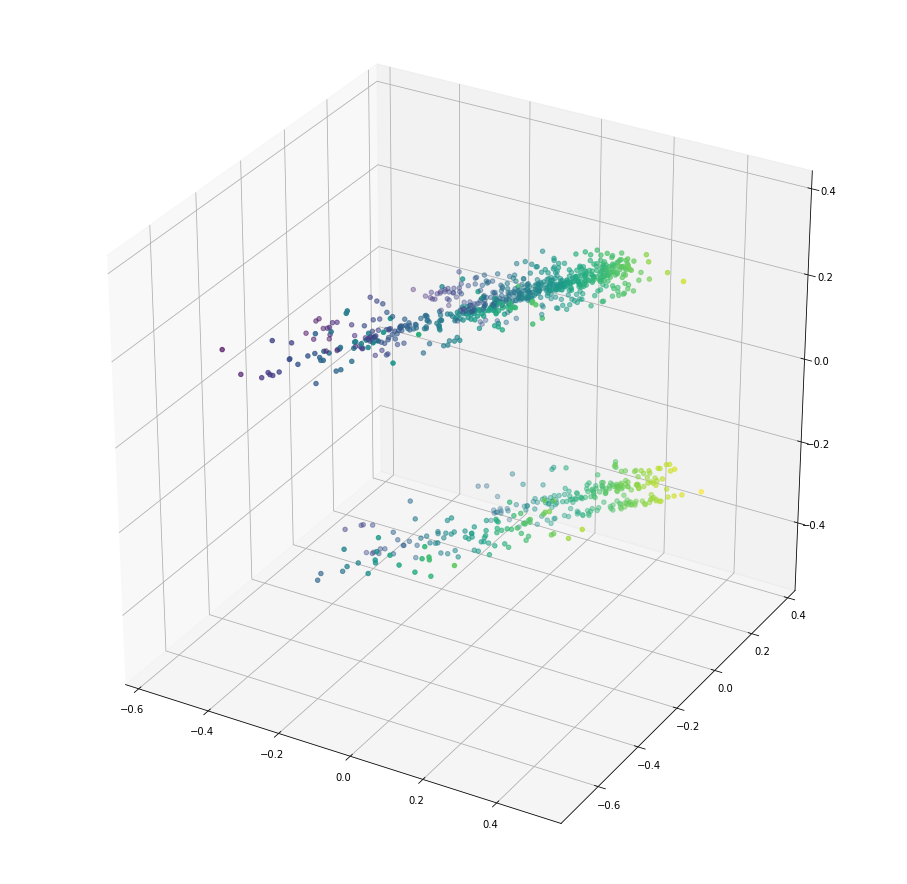

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
x = data[0]
y = data[1]
z = data[2]
ax.scatter(x, y, z, c=x, marker='o')

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(behaviour = 'new', random_state = 42, contamination = 0.05) #contamination= 'auto'

preds = clf.fit_predict(data)

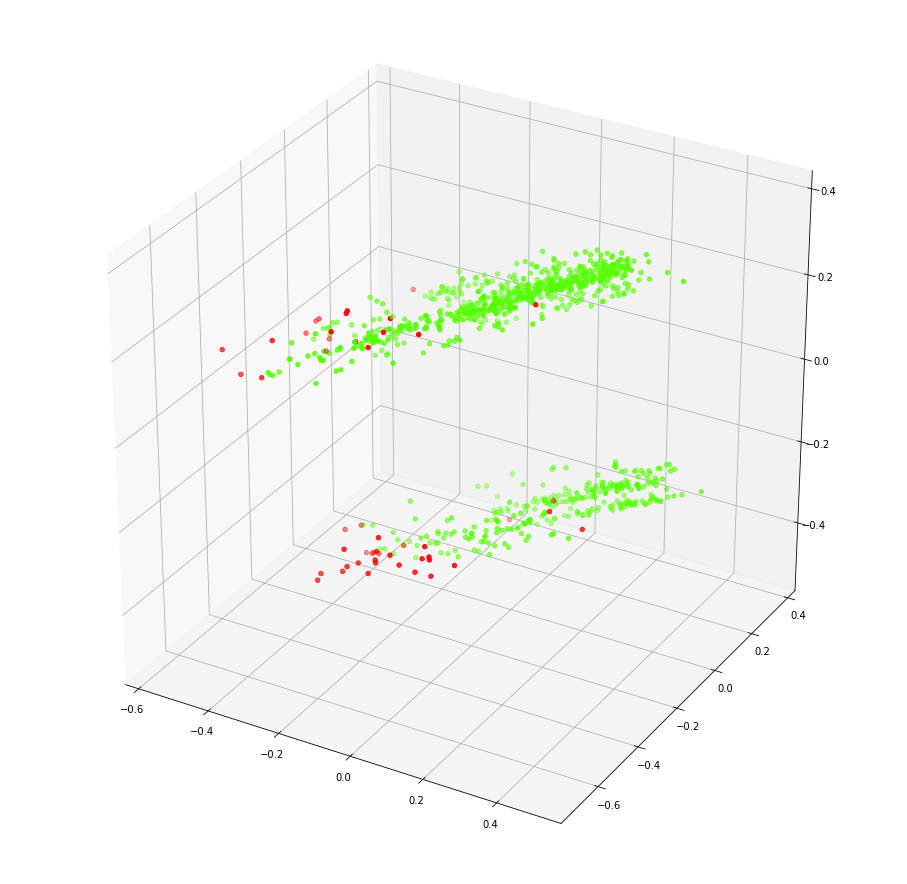

In [ ]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
x = data[0]
y = data[1]
z = data[2]
ax.scatter(x, y, z, c=preds, cmap='prism') # c=preds